# Machine Learning Regression Model

In [1]:
import numpy as np

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

## [ ] Load the data

In [2]:
import pandas as pd

df = pd.read_excel('data/microsoft-linkedin-processed.xlsx' , index_col=0)
df

,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Price,,,,,,,
2016-12-01 00:00:00,59.200001,60.150002,58.939999,60.110001,34542100,0.084387,UP
2016-12-02 00:00:00,59.250000,59.470001,58.799999,59.080002,25515700,1.610763,UP
2016-12-05 00:00:00,60.220001,60.590000,59.560001,59.700001,23552700,-0.450376,DOWN
2016-12-06 00:00:00,59.950001,60.459999,59.799999,60.430000,19907000,2.313831,UP
2016-12-07 00:00:00,61.369999,61.380001,59.799999,60.009998,30809000,-0.590068,DOWN
...,...,...,...,...,...,...,...
2024-11-04 00:00:00,408.459991,410.420013,405.570007,409.799988,19672300,0.729111,UP
2024-11-05 00:00:00,411.459991,414.899994,408.079987,408.369995,17626000,2.075301,UP
2024-11-06 00:00:00,420.179993,420.450012,410.519989,412.420013,26681800,1.234046,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [3]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

In [6]:
from sklearn.tree import plot_tree
# plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

### Calculate the predictions

In [7]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df[["change_tomorrow"]].copy()
df_predictions["predictions"]=y_pred
df_predictions

,change_tomorrow,predictions
Price,,
2016-12-01 00:00:00,0.084387,0.420736
2016-12-02 00:00:00,1.610763,1.610763
2016-12-05 00:00:00,-0.450376,0.068427
2016-12-06 00:00:00,2.313831,2.313831
2016-12-07 00:00:00,-0.590068,0.139121
...,...,...
2024-11-04 00:00:00,0.729111,0.050543
2024-11-05 00:00:00,2.075301,0.050543
2024-11-06 00:00:00,1.234046,0.372271


### Evaluate the model: compare predictions with the reality

In [8]:
model_dt.score(X=explanatory, y=target)

0.4624806226780538

## [ ] How to interpret the error?

In [9]:
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Price,,
2016-12-01 00:00:00,0.084387,0.420736
2016-12-02 00:00:00,1.610763,1.610763
2016-12-05 00:00:00,-0.450376,0.068427
2016-12-06 00:00:00,2.313831,2.313831
2016-12-07 00:00:00,-0.590068,0.139121
...,...,...
2024-11-04 00:00:00,0.729111,0.050543
2024-11-05 00:00:00,2.075301,0.050543
2024-11-06 00:00:00,1.234046,0.372271


In [10]:
import math
df_predictions["error"]=df_predictions.prediction - df_predictions.change_tomorrow
df_predictions["se"] = df_predictions["error"]*df_predictions["error"]
mse = df_predictions["se"].mean()
rmse = math.sqrt(mse)
rmse

1.2755691698368854

<Axes: >

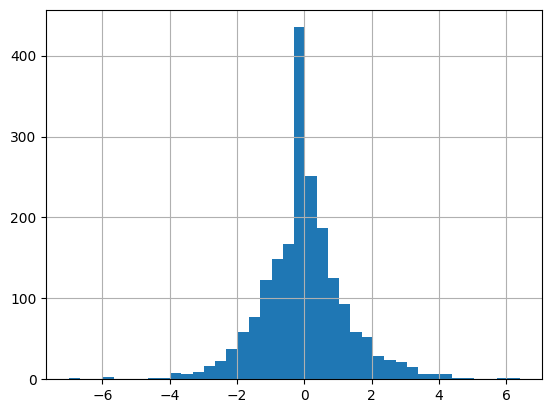

In [11]:
df_predictions.error.hist(bins=40)

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](src/std_normal.png)

source: wikipedia

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [12]:
import pickle

In [13]:
with open('models/my_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)